In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


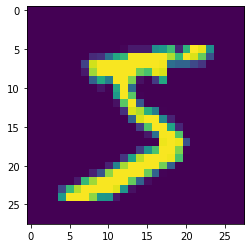

In [ ]:
mnistdb=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnistdb.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
plt.imshow(x_train[0])

In [ ]:
mnistdb=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnistdb.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


TypeError: ignored

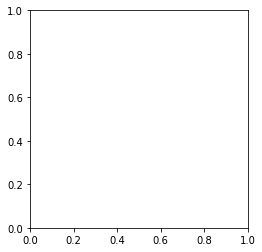

In [ ]:
plt.imshow(x_train[0],cmap='binary')

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
model_mnist=keras.models.Sequential()
model_mnist.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=x_train.shape[1:]))

In [ ]:
model_mnist.add(keras.layers.Conv2D(64,(3,3),activation="relu"))

In [ ]:
model_mnist.add(keras.layers.MaxPooling2D(2,2))

In [ ]:
model_mnist.add(keras.layers.Dropout(0.25))

In [ ]:
model_mnist.add(keras.layers.Flatten())

In [ ]:
model_mnist.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                        

In [ ]:
model_mnist.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                        

In [ ]:
model_mnist.fit(x_train,y_train,epochs=1,batch_size=16)

3750/3750 [==============================] - 188s 50ms/step - loss: 0.1233 - accuracy: 0.9624


In [ ]:
loss,accuracy=model_mnist.evaluate(x_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0486 - accuracy: 0.9851


In [ ]:
n=model_mnist.predict(x_test[0].reshape(1,28,28,1))
print(n)
print(np.argmax(n))

1/1 [==============================] - 0s 19ms/step
[[8.6404818e-08 2.2673960e-09 1.3123378e-06 3.2908548e-04 1.2173875e-08
  1.6579143e-08 1.8979939e-11 9.9966311e-01 1.1651465e-06 5.2612136e-06]]
7


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#DATASET LOADING...
iris = load_iris()
x = iris.data
y = iris.target

#SPLITTING THE DATASET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
c_knn = KNeighborsClassifier(n_neighbors=5)
c_knn.fit(x_train,y_train)
y_pred = c_knn.predict(x_test)

#CHECK ACCURACY...
print("ACCURACY : ",metrics.accuracy_score(y_test,y_pred))

sample = [[2,2,7,3]]
pred = c_knn.predict(sample)
print(pred)
pred_v = [iris.target_names[p] for p in pred]
print(pred_v)

ACCURACY :  0.9777777777777777
[2]
['virginica']


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)
gnb=GaussianNB()
y_pred=gnb.fit(X_train,y_train).predict(X_test)
print(y_pred)
X_new=[[6,6,2,2]]
y_new=gnb.fit(X_train,y_train).predict(X_new)
print("PREDICTING... [[6,6,2,2]]:",y_new)
print("NAIVE BAYES SCORE:               :",gnb.score(X_test,y_test))
print(load_iris().target_names[y_new])

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2]
PREDICTING... [[6,6,2,2]]: [2]
NAIVE BAYES SCORE:               : 0.9333333333333333
['virginica']


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('income.csv')
print(df)
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


model=KMeans(n_clusters=3)
y_pred=model.fit_predict(df[['Age','Income($)']])
y_pred

        Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11    Arnold   27      48000
12     Jared   28      51000
13     Stark   29      49500
14    Ranbir   32      53000
15    Dipika   40      65000
16  Priyanka   41      63000
17      Nick   43      64000
18      Alia   39      80000
19       Sid   41      82000
20     Abdul   39      58000


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

array([[0.1015625 , 0.10800439],
       [0.84375   , 0.18128655],
       [0.70535714, 0.89473684]])

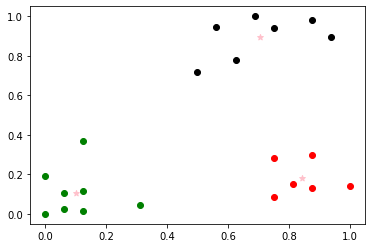

In [ ]:
df['cluster']=y_pred
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='pink',marker='*',label='centroid')
model.cluster_centers_

PosixPath('data/ahgsfd')